<a href="https://colab.research.google.com/github/ZahraDehghani99/AI-Internship/blob/master/HW5/text_classification_with_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work5 - Document Categorization using Transformers

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read data and Data preprocessing

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/NLP/HW4/persica_final_edit.csv')
# df.columns = ['text', 'label']
# df.to_csv('/content/drive/MyDrive/NLP/HW5/persica_hw5.csv', index=False)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP/HW5/persica_hw5.csv')

In [4]:
df.head()

,text,label
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,آموزشي
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,آموزشي
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,آموزشي
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...,آموزشي


In [5]:
print(f'df shape : {df.shape}')

df shape : (10988, 2)


In [6]:
df.label.value_counts()

آموزشي        1000
اقتصادي       1000
بهداشتي       1000
مذهبي         1000
اجتماعي        999
فرهنگي         999
ورزشي          999
تاريخي         998
سياسي          998
فقه و حقوق     998
علمي           997
Name: label, dtype: int64

Let's see the data distribution in each class.

In [7]:
# !pip install -q python-bidi
# !pip install -q arabic-reshaper

In [9]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

classes = [get_display(reshape(label)) for label in df.label]
y_fa = pd.DataFrame(classes)
y_fa.columns = ['label']

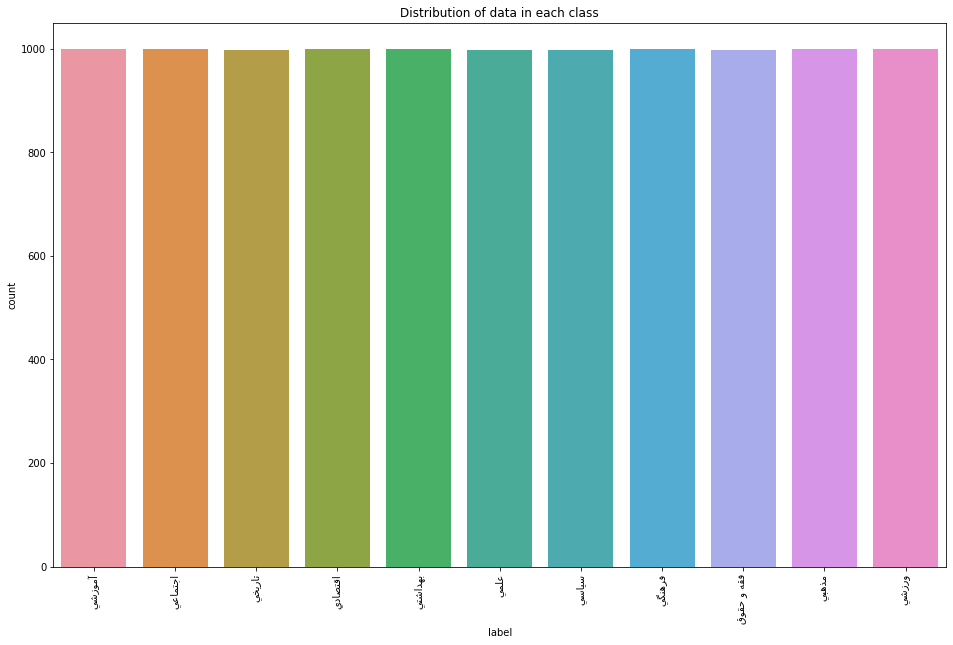

In [10]:
fig = plt.figure(figsize=(16,10))
sns.countplot(x="label", data=y_fa)
plt.title("Distribution of data in each class")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=15)
plt.show()

Let's see length of the news in each class.

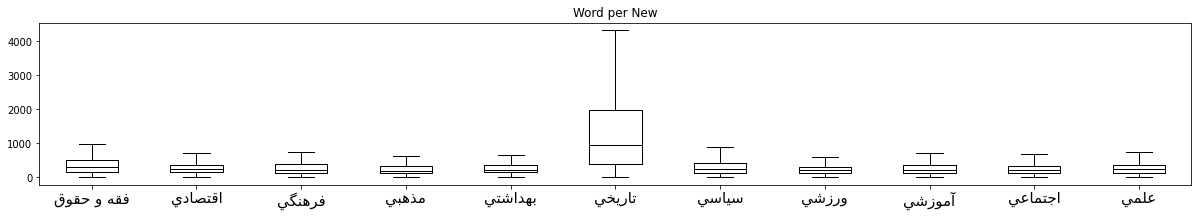

In [24]:
df["Word per New"] = df["text"].str.split().apply(len)
df.boxplot("Word per New", by=y_fa["label"] , grid=False, showfliers=False,
           color="black")

plt.rcParams["figure.figsize"] = (20,3)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
df.head()

,text,label,Word per New
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,آموزشي,365
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,آموزشي,106
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,آموزشي,114
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,آموزشي,351
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...,آموزشي,215


In [25]:
max(df["Word per New"])

6332

## Split X and y

In [27]:
X = df.drop(columns=['Word per New', 'label'])
y = pd.DataFrame(df['label'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (10988, 1)
y shape : (10988, 1)


In [28]:
X.head()

,text
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...


## Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8790, 1)
X_test shape: (2198, 1)
y_train shape: (8790, 1)
y_test shape: (2198, 1)


## Label Encoder

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [31]:
y_train

array([5, 3, 5, ..., 2, 9, 8])

In [33]:
inv =  le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
classes = []
for i in range(len(inv)):
  classes.append(inv[i])
  print(f'{inv[i]} => {i}')

آموزشي => 0
اجتماعي => 1
اقتصادي => 2
بهداشتي => 3
تاريخي => 4
سياسي => 5
علمي => 6
فرهنگي => 7
فقه و حقوق => 8
مذهبي => 9
ورزشي => 10


## Append y to x for train set and test set

In [36]:
X_train['label'] = y_train.tolist()
X_test['label'] = y_test.tolist()

In [44]:
# X_train.to_csv('/content/drive/MyDrive/NLP/HW5/train.csv', index=False)
# X_test.to_csv('/content/drive/MyDrive/NLP/HW5/test.csv', index=False)

In [3]:
train = pd.read_csv('/content/drive/MyDrive/NLP/HW5/train.csv')
train.head()

,text,label
0,به گزارش خبرگزاري دانشجويان ايران (ايسنا) به ن...,5
1,رييس مركز مديريت بيماريهاي وزارت بهداشت از اجر...,3
2,به گزارش خبرنگار سياسي خبرگزاري دانشجويان ايرا...,5
3,به گزارش ايسنا، پويان شاهرخي مدير عامل خانه سي...,7
4,معاون سازمان سنجش آموزش كشور گفت: آزمون مرحله ...,0


In [4]:
print(f'train shape : {train.shape}')

train shape : (8790, 2)


In [5]:
test = pd.read_csv('/content/drive/MyDrive/NLP/HW5/test.csv')
test.head()

,text,label
0,به گزارش خبرنگار سرويس ارتباطات خبرگزاري دانشج...,6
1,به گزارش ايسنا،در اين مراسم كه به رياست آقامحم...,10
2,به گزارش گروه دريافت ايسنا، حميد توكلي طاهباز،...,2
3,به گزارش خبرنگار خبرگزاري دانشجويان ايران (ايس...,7
4,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، تيم...,10


In [6]:
print(f'test shape : {test.shape}')

test shape : (2198, 2)


## Transformers

In [7]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.7 MB 12.6 MB/s 
     |████████████████████████████████| 365 kB 64.1 MB/s 
     |████████████████████████████████| 6.6 MB 42.6 MB/s 
     |████████████████████████████████| 101 kB 8.5 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 212 kB 35.3 MB/s 
     |████████████████████████████████| 115 kB 43.0 MB/s 
     |████████████████████████████████| 141 kB 61.1 MB/s 
     |████████████████████████████████| 127 kB 61.7 MB/s 


In [8]:
from datasets import load_dataset

PATH = "/content/drive/MyDrive/NLP/HW5/"
dataset = load_dataset("csv", data_files={"train": PATH + "train.csv", "test": PATH + "test.csv"})

Using custom data configuration default-656cb8271989e5a3


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-656cb8271989e5a3/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8790
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2198
    })
})

In [55]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 8790
})

In [56]:
dataset['train'].features

{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [57]:
dataset['train'][0]

{'label': 5,
 'text': 'به گزارش خبرگزاري دانشجويان ايران (ايسنا) به نقل از خبرگزاري آسوشيتدپرس، تام ديلي، نماينده\u200cي جمهوري خواه تگزاس در مجلس نمايندگان پس از كناره\u200cگيري در نامه\u200cاي به همكاران جمهوريخواه خود نوشت: در طول دوران حضور من در كنگره هميشه در مسري اخلاق مدارانه حركت كرده\u200cام و قوانين سرزمين\u200cمان را مدنظر داشته\u200cام. وي كه در حال حاضر در تگزاس با دعوي\u200cاي عليه خود به خاطر تقلب انتخاباتي مواجه شده است، همواره تاكيد كرده كه پس از اثبات بي\u200cگناهي\u200cاش وظايف خود را مجددا از سر مي\u200cگيرد. رقابت بر سر جانشيني وي به عنوان رهبر اكثريت جمهوري خواه در مجلس نمايندگان شدت گرفته است. روي بلو نت، از ايالت ميسوري و جان بونر، از اوهايو مهم\u200cترين رقيبان براي تصدي اين پست مي\u200cباشند. از سوي ديگر دموكرات\u200cهاي كنگره در تلاش هستند كه در انتخابات ميان دوره\u200cيي مجلس كه در نوامبر 2006 برگزار خواهد شد، رياست مجلس را به دست آورند. نانسي پلوسي، از كاليفرنيا و رهبر دموكرات\u200cهاي مجلس در رابطه با رسوايي پيش آمده گفت: فرهنگ فساد و ارتشا در جناح جمهوري

## Tokenizing the whole dataset

In [10]:
from transformers import AutoTokenizer

model_ckpt = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [59]:
tokenizer

PreTrainedTokenizerFast(name_or_path='HooshvareLab/bert-base-parsbert-uncased', vocab_size=100000, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [60]:
tokenizer.vocab_size

100000

In [61]:
tokenizer.model_max_length

1000000000000000019884624838656

In [62]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [11]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [65]:
print(tokenize(dataset["train"][0]))

{'input_ids': [2, 2031, 2248, 61826, 1216, 5360, 42906, 7764, 2616, 9, 7764, 39929, 10, 2031, 2836, 2036, 61826, 1216, 13697, 3806, 1160, 5458, 300, 9937, 47982, 1173, 1216, 300, 9010, 10308, 2062, 1216, 3277, 1216, 2683, 12673, 2028, 2543, 9010, 10308, 1160, 2276, 2297, 2036, 1, 2028, 22560, 1216, 2031, 1, 3277, 1216, 5596, 2081, 3695, 17, 2028, 2962, 3595, 2492, 2078, 2028, 1, 2063, 1216, 2749, 2028, 63781, 1216, 5976, 49909, 1, 1, 331, 3986, 10308, 5292, 30344, 2079, 2049, 7427, 17027, 15, 331, 1216, 1, 2028, 2290, 2863, 2028, 12673, 2037, 31533, 24277, 1216, 2395, 7880, 2081, 2031, 2855, 11040, 2829, 1216, 3440, 2110, 2045, 300, 4289, 1, 1, 1, 2297, 2036, 7151, 58465, 81593, 1177, 24277, 1176, 39810, 2081, 2049, 6944, 2036, 2140, 328, 1216, 1161, 25401, 1160, 15, 3396, 2043, 2140, 21782, 10308, 1216, 331, 1216, 2031, 2339, 4153, 1, 3277, 1216, 2683, 2028, 2543, 9010, 10308, 1160, 2276, 4306, 2563, 2045, 15, 38808, 5418, 3767, 300, 2036, 7764, 3064, 328, 52871, 2034, 1216, 331, 3059

In [12]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/1 [00:00<?, ?ba/s]

In [13]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


## Fine-Tunning Transformers

In [14]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
device

device(type='cpu')

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [16]:
from transformers import AutoModelForSequenceClassification

num_labels = 11
model = (AutoModelForSequenceClassification
.from_pretrained(model_ckpt, num_labels=num_labels)
.to(device))

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassifica

In [17]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [19]:
model.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [18]:
model.classifier

Linear(in_features=768, out_features=11, bias=True)

## Defining the performance metrics

In [20]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids #
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

## Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-persika"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")